# HNLCalc: Heavy Neutral Lepton Calculator

## Load Libraries

In [1]:
from HNLCalc import HNLCalc
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib
import math

## Initializing the HNL class

Heavy Neutral Leptons, denoted by $N$, are fermionic gauge singlets that can be added as an extenstion to the standard model. These HNLs mix with the SM active neutrinos, and thus pick up couplings to the SM which are suppresed by a small mixing angle, $U_\alpha$ for $\alpha = e, \mu, \tau$. The phenomenology of these interactions can be described by the following Lagrangian: 

\begin{equation} 
\mathcal{L} \supset -{m_N} \overline{N^c} N  - \frac{1}{\sqrt{2}}g\sum_{\alpha=e,\mu,\tau} {U^*_\alpha}  W_\mu^+  \,\overline{N^c} \, \gamma^\mu l_\alpha  - \frac{1}{2\cos\theta_W}g\sum_{\alpha=e,\mu,\tau} {U^*_\alpha} Z_\mu  \overline{N^c}\, \gamma^\mu \nu_\alpha+ \text{h.c.} . 
\end{equation}

This model has four free parameters: the mass $m_N$ and the three mixing angles $U_\alpha$. The `HNLCalc(ve,vmu,vtau)` class is initialized by specifying the coupling ratio $|U_e|: |U_\mu|: |U_\tau|$. The coupling is automatically normalized, i.e. 0:1:1: and 0:2:2 will net the same results. We define the overall normalization of the couplings by $\epsilon^2 \equiv |U_e|^2 + |U_\mu|^2 + |U_\tau|^2$.  


In [2]:
hnl = HNLCalc(ve=1, vmu=0, vtau=0)

## HNL production

HNLs can be produced through 2-body tau and pseudoscalar meson decays, $P \to l N$ and $\tau \to M N$, or through 3-body tau, $\tau \to l \bar{\nu}_{\tau} N$, $\tau \to l \nu_l N$ and pseudoscalar meson decays, $P \to P'lN, VlN$.

The complete list of channels that are implemented is: 

In [3]:
print("2 body pseudoscalar production modes:\n")
for channel in hnl.get_channels_2body()["mode"]['2body_pseudo']: print(channel['description'])
print("2 body tau production modes:\n")
for channel in hnl.get_channels_2body()["mode"]['2body_tau']: print(channel['description'])
print("3 body pseudoscalar production modes:\n")
for channel in hnl.get_channels_3body()["mode"]['3body_pseudo']: print(channel['description'])
print("3 body vector production modes:\n")
for channel in hnl.get_channels_3body()["mode"]['3body_vector']: print(channel['description'])
print("3 body vector production modes:\n")
for channel in hnl.get_channels_3body()["mode"]['3body_tau']: print(channel['description'])
for channel in hnl.get_channels_3body()["mode"]['3body_tau_nutau']: print(channel['description'])

2 body pseudoscalar production modes:

$D^+ \to e^+ + N$
$D^- \to e^- + N$
$D_s^+ \to e^+ + N$
$D_s^- \to e^- + N$
$B^+ \to + e^+ + N$
$B^- \to + e^- + N$
$B_c^+ \to + e^+ + N$
$B_c^- \to + e^- + N$
$\pi^+ \to + e^+ + N$
$\pi^- \to + e^- + N$
$K^+ \to + e^+ + N$
$K^- \to + e^- + N$
2 body tau production modes:

3 body pseudoscalar production modes:

$D^0 \to K^- + e^+ + N$
$D^0 \to K^+ + e^- + N$
$D^+ \to \bar{K}^0 + e^+ + N$
$D^- \to K^0 + e^- + N$
$B^+ \to \bar{D}^0 + e^+ + N$
$B^- \to D^0 + e^- + N$
$B^0 \to D^- + e^+ + N$
$B^0 \to D^+ + e^- + N$
$B^0_s \to D^-_s + e^+ + N$
$B^0_s \to D^+_s + e^- + N$
$B^+_c \to B^0 + e^+ + N$
$B^-_c \to \bar{B}^0 + e^- + N$
$B^+_c \to B^0_s + e^+ + N$
$B^-_c \to \bar{B}^0_s + e^- + N$
$K^0_S \to \pi^+ + e^- + N$
$K^0_S \to \pi^- + e^+ + N$
$K^0_L \to \pi^+ + e^- + N$
$K^0_L \to \pi^- + e^+ + N$
$K^+ \to \pi^0 + e^+ + N$
$K^- \to \pi^0 + e^- + N$
$D_s^+ \to \eta + e^+ + N$
$D_s^- \to \eta + e^- + N$
$D_s^+ \to \eta\' + e^+ + N$
$D_s^- \to \eta\' + e

We could also choose to group the decay modes by parent particle by using `hnl.get_channels_2body()["parent"]` or `hnl.get_channels_3body()["parent"]`. We can get a list of these parent particles from:

In [4]:
print(list(hnl.get_channels_2body()["parent"].keys()))
print(list(hnl.get_channels_3body()["parent"].keys()))

['$\\pi$', '$K$', '$D$', '$D_s$', '$B$', '$B_c$', '$\\tau$']
['$\\pi$', '$K$', '$K_S$', '$K_L$', '$D$', '$D_0$', '$D_s$', '$B$', '$B_0$', '$B^0_s$', '$B_c$', '$\\tau$']


The list of productions grouped by parent particles for two-body decays is:

In [5]:
for key in hnl.get_channels_2body()["parent"].keys():
    print('Production from 2 body',key,' decays:')
    for channel in hnl.get_channels_2body()["parent"][key]: print(channel['description'])
    print('\n')

Production from 2 body $\pi$  decays:
$\pi^+ \to + e^+ + N$
$\pi^- \to + e^- + N$


Production from 2 body $K$  decays:
$K^+ \to + e^+ + N$
$K^- \to + e^- + N$


Production from 2 body $D$  decays:
$D^+ \to e^+ + N$
$D^- \to e^- + N$


Production from 2 body $D_s$  decays:
$D_s^+ \to e^+ + N$
$D_s^- \to e^- + N$


Production from 2 body $B$  decays:
$B^+ \to + e^+ + N$
$B^- \to + e^- + N$


Production from 2 body $B_c$  decays:
$B_c^+ \to + e^+ + N$
$B_c^- \to + e^- + N$


Production from 2 body $\tau$  decays:




In [6]:
for key in hnl.get_channels_3body()["parent"].keys():
    print('Production from three-body',key,' decays:')
    for channel in hnl.get_channels_3body()["parent"][key]: print(channel['description'])
    print('\n')

Production from three-body $\pi$  decays:


Production from three-body $K$  decays:
$K^+ \to \pi^0 + e^+ + N$
$K^- \to \pi^0 + e^- + N$


Production from three-body $K_S$  decays:
$K^0_S \to \pi^+ + e^- + N$
$K^0_S \to \pi^- + e^+ + N$


Production from three-body $K_L$  decays:
$K^0_L \to \pi^+ + e^- + N$
$K^0_L \to \pi^- + e^+ + N$


Production from three-body $D$  decays:
$D^+ \to \bar{K}^0 + e^+ + N$
$D^- \to K^0 + e^- + N$
$D^+ \to \pi^0 + e^+ + N$
$D^- \to \pi^0 + e^- + N$
$D^+ \to \eta + e^+ + N$
$D^- \to \eta + e^- + N$
$D^+ \to \eta\' + e^+ + N$
$D^- \to \eta\' + e^- + N$
$D^+ \to \rho^0 + e^+ + N$
$D^- \to \rho^0 + e^- + N$
$D^- \to K^{*0} + e^- + N$
$D^+ \to \bar{K}^{*0} + e^+ + N$
$D^- \to \omega + e^- + N$
$D^+ \to \omega + e^+ + N$


Production from three-body $D_0$  decays:
$D^0 \to K^- + e^+ + N$
$D^0 \to K^+ + e^- + N$
$D^0 \to \pi^- + e^+ + N$
$\bar{D}^0 \to \pi^+ + e^- + N$
$D^0 \to K^{*-} + e^+ + N$
$D^0 \to K^{*+} + e^- + N$
$D^0 \to \rho^- + e^+ + N$
$\bar{D}^0 \t

For now, we will not worry about grouping the decays by parent meson as illustrated above or by the modes, we will instead focus on two and three-body decays.

In [7]:
channels_2body = sum(hnl.get_channels_2body()["mode"].values(), [])
channels_3body = sum(hnl.get_channels_3body()["mode"].values(), [])

For every production channel implemented, we provide the branching fraction as an evaluateable string that depends on the HNL `mass` and `coupling`, defined by $\epsilon^2 = |U_e|^2 + |U_\mu|^2 + |U_\tau|^2$, using the functions `hnl.get_channels_2body()` and `hnl.get_channels_3body()` respectively. 

For the case of two body production, $A\to N B$, the function `sum(hnl.get_channels_2body()["mode"].values(), [])` returns a dictionary with keys `[label, pid0, pid1, br, description]`, where `label` is the name of the production mode, `pid0` and `pid1` are the particle id numbers of the parent $A$ and outgoing particle $B$ respectively, the string `br` is the evaluateable **total branching fraction**, and `description` is the latex label for the production mode. 

For the case of three-body production, $A\to N B C$, the function `sum(hnl.get_channels_3body()["mode"].values(), [])` returns a dictionary with keys `[label, pid0, pid1, pid2, br, integration, description]`, where `label` is the name of the production mode, `pid0`, `pid1`, and `pid2` are the particle id numbers of the parent $A$ and outgoing particles $B$ and $C$ respectively, the string `br` is the evaluateable **differential branching fraction**, `integration` denotes which integration variables that `br` is given in terms of, and `description` is the latex label for the production mode. For the case of three-body meson decays, `pid0` is the parent meson, `pid1` is the daughter meson, `pid2` is the daughter lepton, and the integration method integrates over $q^2 = (p_l + p_N)^2$ and $dE_N$. For the case of three-body $\tau$ decay `pid0` is the $\tau$ lepton, **pid1** is the daughter lepton, `pid2` is the daughter neutrino, and it involves integration over $dE_N$

Differential branching fractions are used for 3-body production since Monte-Carlo (MC) event generators need adequate information to sample over particle kinematics, rather than just computing the total rates. 

Here we print a few total and differential branching fractions as examples. 

In [8]:
print ("2body decay BR for "+channels_2body[0]['description']+":\n")
print (channels_2body[0]['br'])

2body decay BR for $D^+ \to e^+ + N$:

hnl.get_2body_br(411, -11)


We can find the total branching fraction by defining the mass and coupling

In [9]:
coupling,mass=1e-3,1
print (eval(channels_2body[0]['br']))

0.02069860411438542*coupling**2*mass**2*1.86966*(1.-(mass/1.86966)**2 + 2.*(0.0005109989461/1.86966)**2 + (0.0005109989461/mass)**2*(1.-(0.0005109989461/1.86966)**2)) * np.sqrt((1.+(mass/1.86966)**2 - (0.0005109989461/1.86966)**2)**2-4.*(mass/1.86966)**2)


For three-body we can find the differential branching fraction.

In [10]:
print ("3body decay differential BR d^2sigma/dE/dq2 for "+channels_3body[0]['description']+":\n")
print (channels_3body[0]['br'])

3body decay differential BR d^2sigma/dE/dq2 for $D^0 \to K^- + e^+ + N$:

hnl.get_3body_dbr_pseudoscalar(421,-321,-11)


The total branching fraction can then be found by integrating over $q^2$ and $E_N$.

In [11]:
label, pid0, pid1, pid2 , br, integration, latex_label = channels_3body[0].values()
m0, m1, m2 = hnl.masses(pid0), hnl.masses(pid1), hnl.masses(pid2)
print(r'$Br($D^0 \\to K^- + e^+ + N$) = ', hnl.integrate_3body_br(eval(br), mass, m0, m1, m2, integration=integration))

$Br($D^0 \\to K^- + e^+ + N$) =  0.0033270629067106913


Here we evaluate and plot some 2-body production branching fractions for a given range of masses and unit coupling $\epsilon=1$.

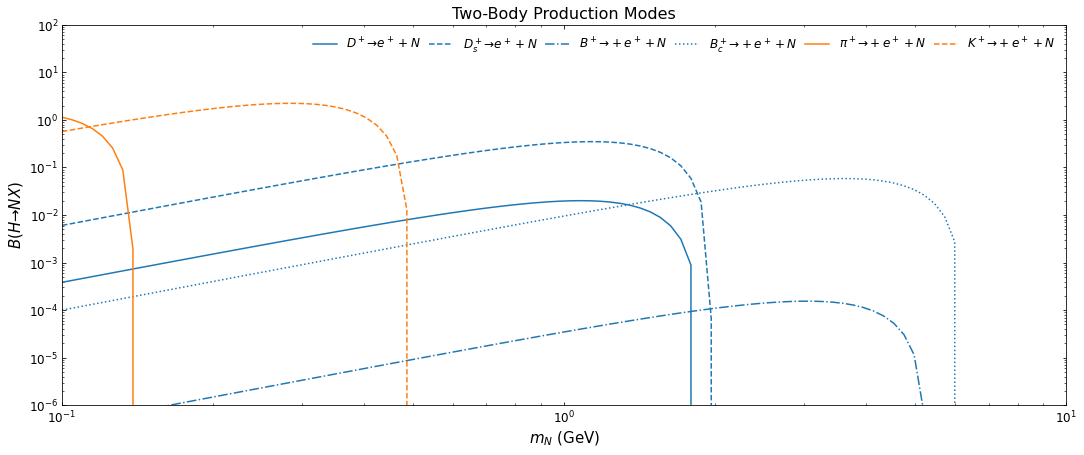

In [12]:
fig,ax = HNLCalc.initialize_plot(x_label = r"$m_N$ (GeV)", y_label = r"$B(H \to N X)$", title = "Two-Body Production Modes", xlims = (1e-1,10), ylims = (1e-6,100))

# get subset of channels
production_channels_2body = channels_2body[::2][:6]
masses, coupling = np.logspace(-1,1,100), 1

# get BR
branching_fractions, latex_labels  = {}, {}
for production_channel in production_channels_2body:
    label, pid0, pid1, br, latex_label = production_channel.values()
    branching_fractions[label] = [eval(eval(br)) if mass<hnl.masses(pid0)-hnl.masses(pid1) else 0 for mass in masses]
    latex_labels[label] = latex_label

# plot
for label in branching_fractions.keys():
    ax.plot(masses, branching_fractions[label], label=latex_labels[label]) 

_=ax.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=6,labelspacing=0,columnspacing = .65)

Likewise, we evaluate some 3-body production total branching fractions using the `hnl.integrate_3body_br` function to integrate over the differential branching fractions. 

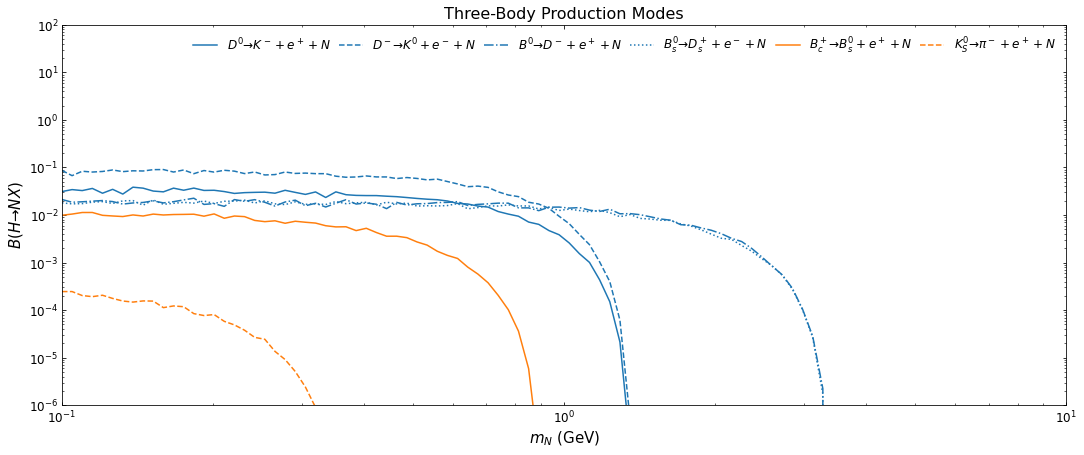

In [13]:
fig, ax = HNLCalc.initialize_plot(x_label = r"$m_N$ (GeV)", y_label = r"$B(H \to N X)$", title = "Three-Body Production Modes", xlims = (1e-1,10), ylims = (1e-6,100))

# get subset of channels
production_channels_3body = channels_3body[::3][:6]
masses, coupling = np.logspace(-1,1,100), 1

# get BR
branching_fractions, latex_labels  = {}, {}
for production_channel in production_channels_3body:
    label, pid0, pid1, pid2 , br, integration, latex_label = production_channel.values()
    m0, m1, m2 = hnl.masses(pid0), hnl.masses(pid1), hnl.masses(pid2)
    branching_fractions[label] = [hnl.integrate_3body_br(
        eval(br), mass, m0, m1, m2, integration=integration) for mass in masses]
    latex_labels[label] = latex_label

for label in branching_fractions.keys():
    ax.plot(masses, branching_fractions[label], label=latex_labels[label])

_=ax.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=6,labelspacing=0,columnspacing = .65)
fig.savefig(f'HNL_3Body_Production.png',format='png',bbox_inches='tight')

From `hnl.get_channels_2body()['parent']` or `hnl.get_channels_3body()['parent']` we can easily obtain information on processes regarding a parent meson, for example, the all of the information you need from two-body kaon decays is given by:

In [14]:
hnl.get_channels_2body()['parent'][r"$K$"]

[{'label': '2body_321_-11',
  'pid0': '321',
  'pid1': '-11',
  'br': 'hnl.get_2body_br(321, -11)',
  'description': '$K^+ \\to + e^+ + N$'},
 {'label': '2body_-321_11',
  'pid0': '-321',
  'pid1': '11',
  'br': 'hnl.get_2body_br(-321, 11)',
  'description': '$K^- \\to + e^- + N$'}]

This allows us to easily obtain the contribution of a parent particle to the branching fraction Br($H \to N X$). Lets plot this below and show all contributions to this branching fraction, organized by parent particle, using two-body decays for simplicity. The user can set `tf_3body` to `True` if they want to also include three-body decays.

In [15]:
tf_2body = True
tf_3body = False

keys = []
if tf_2body==True:
    keys+=list(hnl.get_channels_2body()['parent'].keys())
if tf_3body==True:
    keys+=list(hnl.get_channels_3body()['parent'].keys())


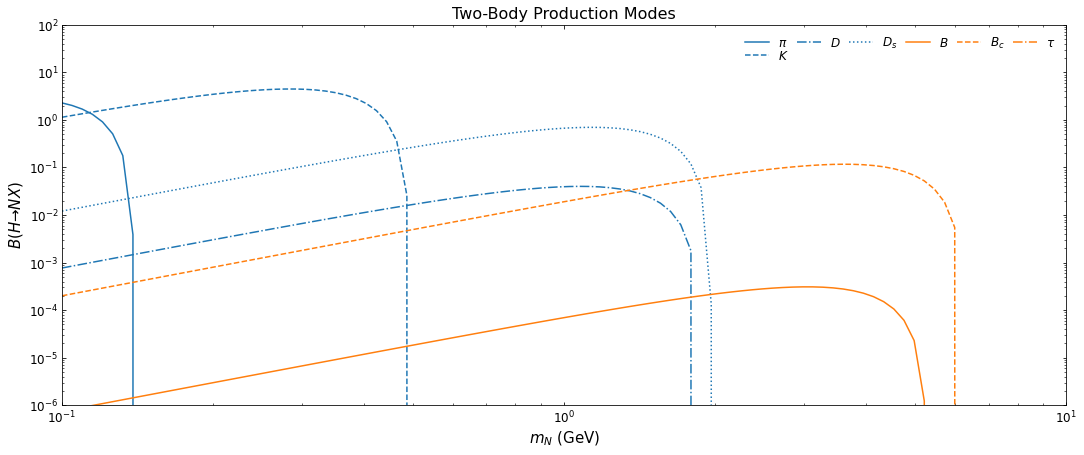

In [16]:
fig,ax = HNLCalc.initialize_plot(x_label = r"$m_N$ (GeV)", y_label = r"$B(H \to N X)$", title = "Two-Body Production Modes", xlims = (1e-1,10), ylims = (1e-6,100))

masses, coupling = np.logspace(-1,1,100), 1

#get total br for parent
for key in keys:
    br_tot = np.array([0.0 for n in range(len(masses))])
    #2 body grouping
    if key in hnl.get_channels_2body()['parent'].keys() and tf_2body==True:
        #add all brs for like parent mesons
        for n in range(len(hnl.get_channels_2body()['parent'][key])):
            _, pid0, pid1, br, _ = hnl.get_channels_2body()['parent'][key][n].values()
            br_arr = np.array([eval(eval(br)) if mass<hnl.masses(pid0)-hnl.masses(pid1) else 0 for mass in masses])
            br_tot += br_arr

    #3 body grouping
    if key in hnl.get_channels_3body()['parent'].keys() and tf_3body==True:
        #add all brs for like parent mesons
        for n in range(len(hnl.get_channels_3body()['parent'][key])):
            label, pid0, pid1, pid2 , br, integration, latex_label = hnl.get_channels_3body()['parent'][key][n].values()
            m0, m1, m2 = hnl.masses(pid0), hnl.masses(pid1), hnl.masses(pid2)
            br_arr = np.array([hnl.integrate_3body_br(
                eval(br), mass, m0, m1, m2, integration=integration) if mass<m0-m1-m2 else 0 for mass in masses])
            br_tot += br_arr
    ax.plot(masses,br_tot, label = key)

_=ax.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=6,labelspacing=0,columnspacing = .65)

## HNL Decay
HNLs can decay into purely leptonic finalstates, $\nu\, l_\alpha^+ l_\beta^-$ and $\nu\nu\nu$, or hadronic finalstates, $\nu H^0 $, $l^\pm H^\mp $, $\nu (\geq 3H)$ and $l^\pm(\geq 3H)$. The list of decay modes that are active in the defined model can be obtained via `hnl.decay_modes` as a list of tuples. The modes containing `'3had'`, refer to decays into 3 or more hadrons. 

In [17]:
print(f"Active Decay Modes:\n")
for mode in hnl.decay_modes:
       print(f"{mode}")

Active Decay Modes:

('nu', 'e', 'anti_e')
('nu', 'mu', 'anti_mu')
('nu', 'tau', 'anti_tau')
('e', 'anti_mu', 'nu')
('mu', 'anti_e', 'nu')
('e', 'anti_tau', 'nu')
('tau', 'anti_e', 'nu')
('nu', 'nu', 'nu')
('nu', 'pi0')
('nu', 'eta')
('nu', 'etap')
('e', 'pi+')
('anti_e', 'anti_pi+')
('e', 'K+')
('anti_e', 'anti_K+')
('e', 'D+')
('anti_e', 'anti_D+')
('e', 'Ds+')
('anti_e', 'anti_Ds+')
('nu', 'rho0')
('nu', 'omega')
('nu', 'phi')
('e', 'rho+')
('anti_e', 'anti_rho+')
('e', 'K+star')
('anti_e', 'anti_K+star')
('e', '3had')
('anti_e', '3had')
('nu', '3had')


 The function `hnl.get_br_and_ctau()` is used to generate the HNL branching fractions and decay length $c\tau$ for the masses given by `mpts` and $\epsilon$ given by `coupling`. The branching fractions are saved as a dictionary `hnl.model_brs` which takes as a key the tuples given by `hnl.decay_modes` and the decay length $c\tau$ is saved to the `hnl.ctau` array. The branching fractions are also saved to the `model/br` folder as `.csv` tables, i.e. `nu-pi0.csv`, and likewise, the $c\tau$ vs mass table is saved to the file`model/ctau/ctau.txt`. 

In [18]:
masses, coupling = np.logspace(-1,1, 401), 1e-3

hnl.get_br_and_ctau(mpts = masses,coupling = coupling)

If, for example, we wanted to access the branching fraction of the $\nu\pi^0$ mode for the first 50 mass points defined above, we can call the `model_brs` dictionary with: 

In [19]:
print(hnl.model_brs[('nu','pi0')][:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015559688964559138, 0.059876504819961374, 0.12220773530826731, 0.18761951410829922, 0.2416076065433034, 0.28126767831255184, 0.3085958448038921, 0.3268207997159702, 0.3387584421305231, 0.34646742239537714, 0.3513529929973954, 0.3543502330286291, 0.35607785642043244, 0.35694682047533094, 0.35723232798913485, 0.35712048800867524, 0.3567384176598934, 0.3561737471160938, 0.35548737045941564, 0.3547218729737861, 0.35390716679693773, 0.35306430461005767, 0.35220809028916866]


Here we plot the relevant HNL decay branching fractions for the defined model. We split these into the neutral current mediated and charged current mediated channels.  

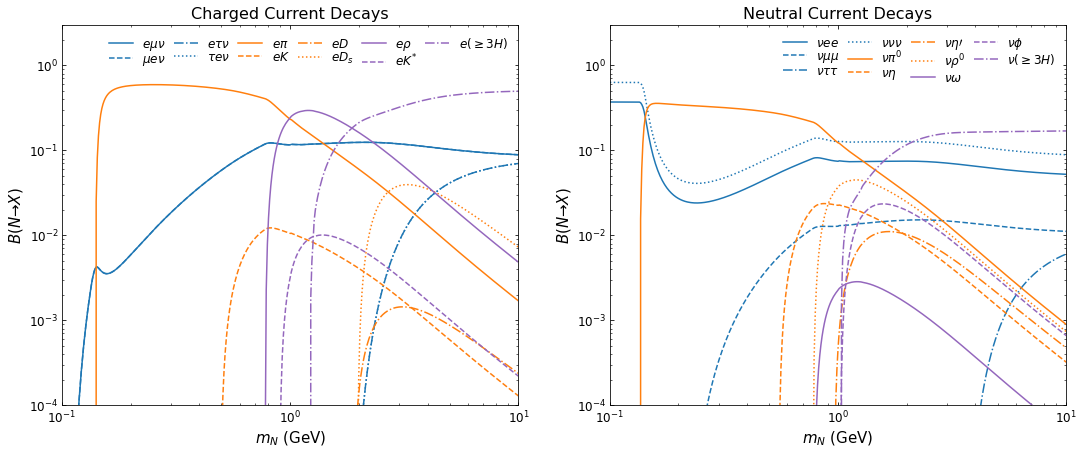

In [20]:
#setup figures
fig,(ax,ax1) = plt.subplots(1,2)

#define custom color cycler
custom_cycler = (cycler(color=['tab:blue','tab:orange','tab:purple', 'y', 'r','green','c'])* 
                 cycler(ls=['-', '--', '-.', 'dotted']))

ax.set_prop_cycle(custom_cycler)
ax1.set_prop_cycle(custom_cycler)

fig.set_size_inches(18,7, forward=True)

ax.set_title(r"Charged Current Decays",fontsize = 16)
ax1.set_title(r"Neutral Current Decays",fontsize = 16)

for a in [ax,ax1]:
    
    a.set(xscale = 'log', yscale = 'log',xlim=(1e-1,1e1),ylim = (1e-4,3))
   
    a.tick_params(axis='both', which='major',direction='in',top=True,right=True)
    
    a.tick_params(axis='both', which='minor',direction='in',top=True,right=True)
    
    a.set_xlabel(r"$m_N$ (GeV)",fontsize=15)
    a.set_ylabel(r"$B(N\to X)$",fontsize=15)
    a.tick_params(axis='x', labelsize=12)
    a.tick_params(axis='y', labelsize=12)

#plot model brs
for mode in hnl.decay_modes: 

    label = r"" 
    for p in mode: label += hnl.plot_labels_neut[p]

    if mode[0] == 'nu': ax1.plot(masses,hnl.model_brs[mode], label =label)
    
    elif mode[0] != 'nu' and 'anti_' not in mode[0]: ax.plot(masses,2*np.array(hnl.model_brs[mode]), label =label)


ax.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=6,labelspacing=0,columnspacing = .65)
ax1.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=4,labelspacing=0,columnspacing = .65)



fig.savefig(f'HNL-Decay.png',format='png',bbox_inches='tight')

We can additionally plot the decay length via `hnl.ctau`. 

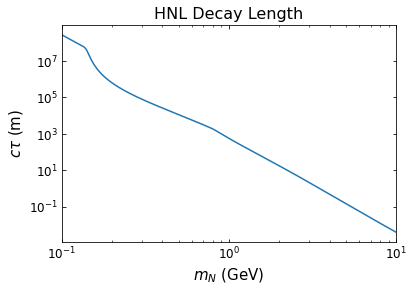

In [21]:
#setup figure
fig,ax = plt.subplots()
fig.set_size_inches(6,4, forward=True)

ax.set_title(r"HNL Decay Length",fontsize = 16)
ax.set(xscale = 'log', yscale = 'log',xlim=(1e-1,1e1))
ax.tick_params(axis='both', which='major',direction='in',top=True,right=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True,right=True)
ax.set_xlabel(r"$m_N$ (GeV)",fontsize=15)
ax.set_ylabel(r"$c\tau$ (m)",fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

#plot ctau
ax.plot(masses,hnl.ctau)

fig.savefig(f'HNL-ctau.png',format='png',bbox_inches='tight')